In [2]:
import time_series_helper
import numpy as np
from sklearn.model_selection import train_test_split

X, y, num_features = time_series_helper.make_data_for_model()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

RNN = Sequential([
    LSTM(128, activation='relu', input_shape=(14, num_features), return_sequences=False),
    Dense(1)
])

RNN.compile(optimizer='adam', loss='mse')
RNN.summary()

history = RNN.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/Users/buekarlc/miniconda3/envs/ml/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        78,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,465 (306.50 KB)

 Trainable params: 78,465 (306.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.3000 - val_loss: 1.7466
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7273 - val_loss: 1.8044
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7366 - val_loss: 1.7576
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7123 - val_loss: 1.7553
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7263 - val_loss: 1.7611
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7039 - val_loss: 1.7264
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6613 - val_loss: 1.7717
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6563 - val_loss: 1.7750
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6692 - val_loss: 1.9102
Epoch 10/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5802 - val_loss: 1.7724
Epoch 11/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5618 - val_loss: 1.8121
Epoch 12/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [4]:
y_pred = RNN.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: " + str(mse))
print("RMSE: " +str(np.sqrt(mse)))
print("MAE: " + str(mae))

MSE: 2.848893404006958
RMSE: 1.687866524345737
MAE: 1.287917971611023


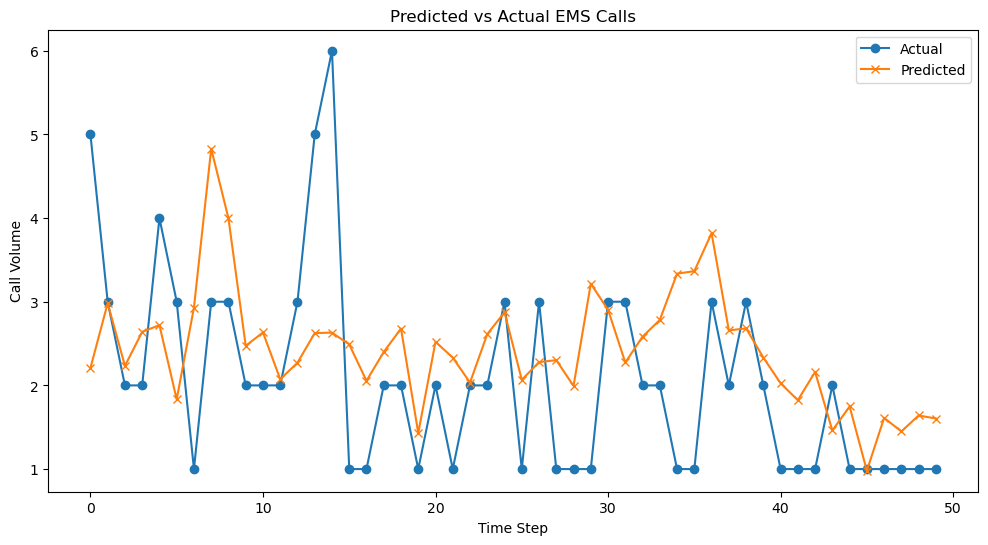

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.legend()
plt.title('Predicted vs Actual EMS Calls')
plt.xlabel('Time Step')
plt.ylabel('Call Volume')
plt.show()